In [1]:
#Given anonymized data, can I classify it without knowing the context of the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#trying out cufflinks
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
#for connecting javascript to notebook
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df=pd.read_csv('Classified Data', index_col=0)

In [6]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [8]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [7]:
#I need to standardize the target class column in order to use this data
from sklearn.preprocessing import StandardScaler

In [8]:
#creating an instance of standard scaler
scaler=StandardScaler()

In [9]:
#Fit to all feature columns
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
#Transform data by centering and scaling
scaled_features =scaler.transform(df.drop('TARGET CLASS', axis=1))

In [13]:
#looking up feature names except the last column. I won't treat that as a feature
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [11]:
#We will normalize all the features except for the TARGET CLASS Column. Use slice notation to get every feature but the last one
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [12]:
df_feat.head() #standardized version of our data

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


# Train, Test, Split your data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
#We need to create a train and test split for our model
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.30, random_state=101)

In [24]:
#Use the elbow method to choose a k value
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn=KNeighborsClassifier(n_neighbors=1) #specify the number of neighbors we want to start off with is one

In [26]:
knn.fit(X_train,y_train) # passing in training data and fitting the training data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [27]:
pred = knn.predict(X_test) # Grab predictions from it for evaluation

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[151   8]
 [ 15 126]]
             precision    recall  f1-score   support

          0       0.91      0.95      0.93       159
          1       0.94      0.89      0.92       141

avg / total       0.92      0.92      0.92       300



# Use the elbow method to find the k value with the lowest error rate

In [19]:
#Now let's switch up the K value to get a better prediction
error_rate=[] #empty list, iterate many K values and see which value gives the lowest error rate

for i in range(1,40):
    
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) #New item added to list, append the mean of pred_i not equal to y test which is the average error rate where predictions not equal to actual test values.
                                                 # Take mean of that value and append to the list

Text(0,0.5,'Error Rate')

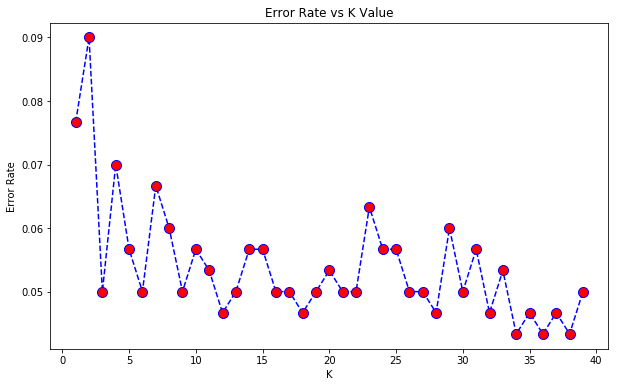

In [20]:
plt.figure(figsize=(10,6)) # Plotting out error rate vs K values
plt.plot(range(1,40), error_rate, color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K' )
plt.ylabel('Error Rate')

In [30]:
#pick a higher k value for a lower error rate
knn= KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[153   6]
 [  9 132]]


             precision    recall  f1-score   support

          0       0.94      0.96      0.95       159
          1       0.96      0.94      0.95       141

avg / total       0.95      0.95      0.95       300



# Interpreting confusion matrix
#interpreting my confusion matrix
#in class 0, there were a total of 159. Out of these, my model successfully ID'd 153 but 6 were marked as class 1
#in class 1, there were a total of 141. Out of these, my model successfully ID'd 132 but 9 were marked as class 0

#recall = for class 0 153/159 = 0.96
#	 for class 1 132/141 = 0.93

# Interpreting classification report
#The f1-score gives you the harmonic mean of precision and recall. The scores corresponding to every class will tell you the accuracy of the classifier in classifying the data points in that particular class compared to all other classes.
#The support is the number of samples of the true response that lie in that class.
#The last line gives a weighted average of precision, recall and f1-score where the weights are the support values. so for precision the avg is (0.94*159 + 0.96*141)/300 = 0.95. The total is just for total support which is 300 here.

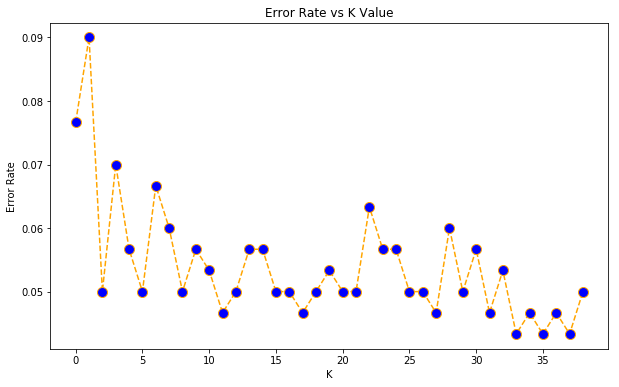

In [33]:
plt.figure(figsize=(10,6))
plt.plot(error_rate, color='orange',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10);
plt.title('Error Rate vs K Value');
plt.xlabel('K' );
plt.ylabel('Error Rate');

In [59]:
#In order to plot the error rate in cufflinks, you need to convert the error_rate from a list to a dataframe using pandas
new=pd.DataFrame(error_rate, columns=['Error Rate'])
new

,Error Rate
0,0.076667
1,0.090000
2,0.050000
3,0.070000
4,0.056667
5,0.050000
6,0.066667
7,0.060000
8,0.050000
9,0.056667


In [60]:
#Now you can plot the data frame using cufflinks
new.iplot(title='Error Rate vs K Value', xTitle='K Value', yTitle='Error Rate', zTitle='', theme='white', colors='blue', colorscale=None, fill=False, width=None, dash='dash', symbol='circle-dot', size=12)

# Summary

1) Read Classified Data
2) Standardize data to same scale (use standardscaler, create scaler object, fit to features,scalertransform to scale features,put into a df)
3) Train, test, split on scaled features
4) Use KNN classifier (start w/ low K value)
5) Ran model, checked the confusion matrix and classification report
6) Used elbow method to find optimal K
7) Reran model and compared the new confusion matrix and classification report to old. Improvement expected